In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cityseer.metrics import networks
from cityseer.tools import graphs, io

streets_gpd = gpd.read_file("data/madrid_streets/street_network.gpkg")
streets_gpd = streets_gpd.explode(reset_index=True)
G = io.nx_from_generic_geopandas(streets_gpd)
G_dual = graphs.nx_to_dual(G)

100%|██████████| 47155/47155 [00:05<00:00, 7906.99it/s]
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
100%|██████████| 47129/47129 [00:00<00:00, 175069.90it/s]
INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
100%|██████████| 47129/47129 [00:01<00:00, 46868.40it/s]
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)
100%|██████████| 47129/47129 [00:30<00:00, 1550.65it/s]


In [2]:
# prepare the data structures
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(
    G_dual, crs=streets_gpd.crs
)

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.
100%|██████████| 47129/47129 [00:18<00:00, 2518.45it/s]


## Calculate centralities

The centrality methods can now be computed.


In [ ]:
distances = [500, 5000]
nodes_gdf = networks.node_centrality_shortest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    distances=distances,
)

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
100%|██████████| 47129/47129 [00:46<00:00, 1008.14it/s]
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 500m, Beta: 0.008, Walking Time: 6.25 minutes.
INFO:cityseer.config:Distance: 1000m, Beta: 0.004, Walking Time: 12.5 minutes.
INFO:cityseer.config:Distance: 2000m, Beta: 0.002, Walking Time: 25.0 minutes.
INFO:cityseer.config:Distance: 5000m, Beta: 0.0008, Walking Time: 62.5 minutes.


In [4]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_500', 'cc_beta_1000', 'cc_beta_2000',
       'cc_beta_5000', 'cc_cycles_500', 'cc_cycles_1000', 'cc_cycles_2000',
       'cc_cycles_5000', 'cc_density_500', 'cc_density_1000',
       'cc_density_2000', 'cc_density_5000', 'cc_farness_500',
       'cc_farness_1000', 'cc_farness_2000', 'cc_farness_5000',
       'cc_harmonic_500', 'cc_harmonic_1000', 'cc_harmonic_2000',
       'cc_harmonic_5000', 'cc_hillier_500', 'cc_hillier_1000',
       'cc_hillier_2000', 'cc_hillier_5000', 'cc_betweenness_500',
       'cc_betweenness_1000', 'cc_betweenness_2000', 'cc_betweenness_5000',
       'cc_betweenness_beta_500', 'cc_betweenness_beta_1000',
       'cc_betweenness_beta_2000', 'cc_betweenness_beta_5000'],
      dtype='object')

## Plots

Let's plot a selection of distance thresholds for each of the computed measures.


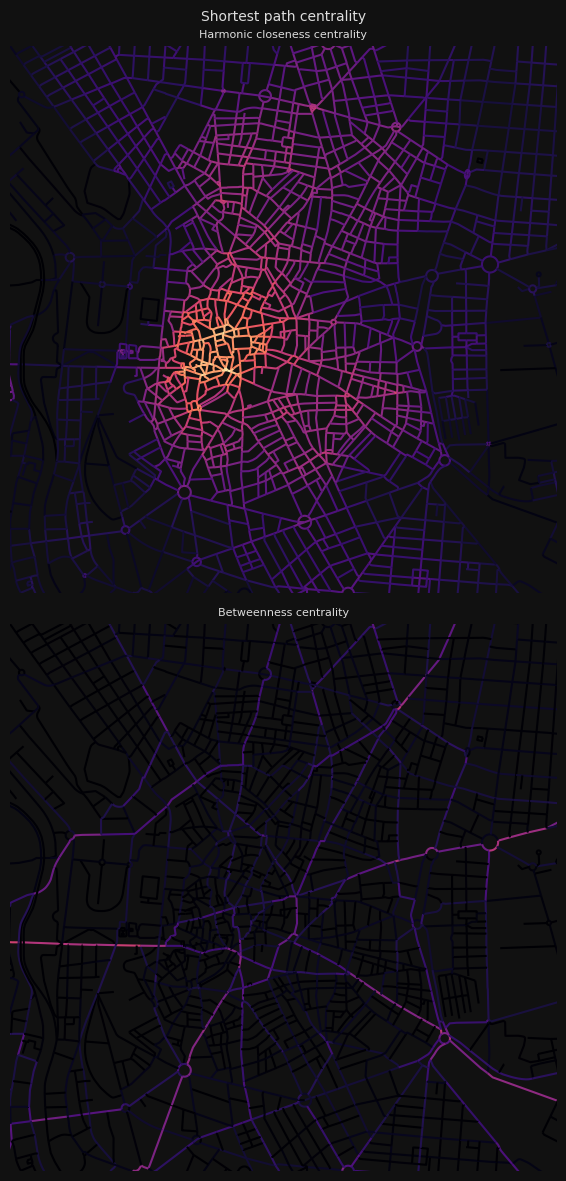

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12), facecolor="#111")
fig.suptitle(
    "Shortest path centrality",
    fontsize=10,
    color="#ddd",
)

nodes_gdf.plot(
    column="cc_harmonic_500",
    cmap="magma",
    legend=False,
    ax=axes[0],
)
axes[0].set_title(
    "Harmonic closeness centrality",
    fontsize=8,
    color="#ddd",
)

nodes_gdf.plot(
    column="cc_betweenness_5000",
    cmap="magma",
    legend=False,
    ax=axes[1],
)
axes[1].set_title(
    "Betweenness centrality",
    fontsize=8,
    color="#ddd",
)

for ax in axes:
    ax.set_xlim(438500, 438500 + 3500)
    ax.set_ylim(4472500, 4472500 + 3500)
    ax.axis(False)

plt.tight_layout()